In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [17]:
df=pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
df.drop("Id",axis=1,inplace=True)

In [19]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
df.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

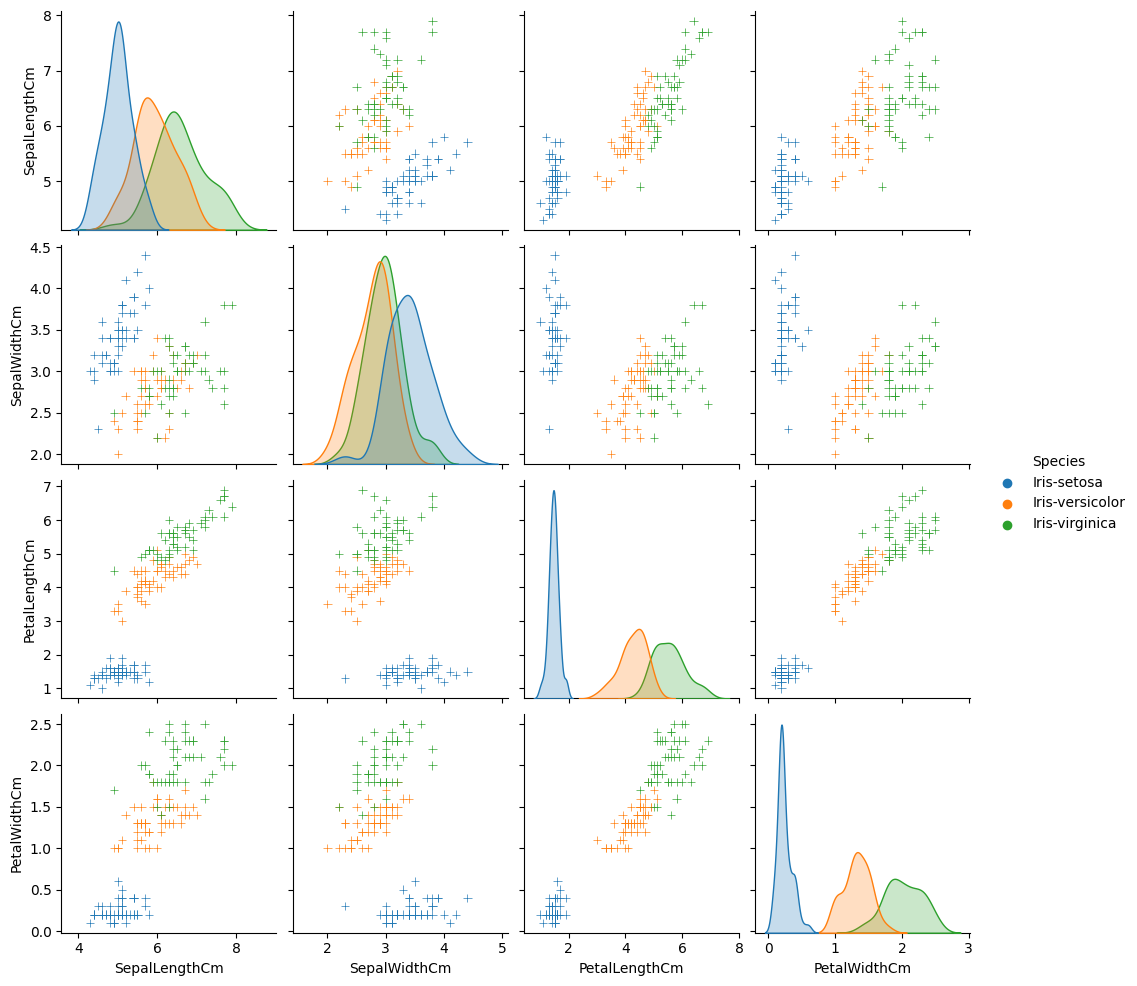

In [24]:
sns.pairplot(df,hue="Species",markers="+")

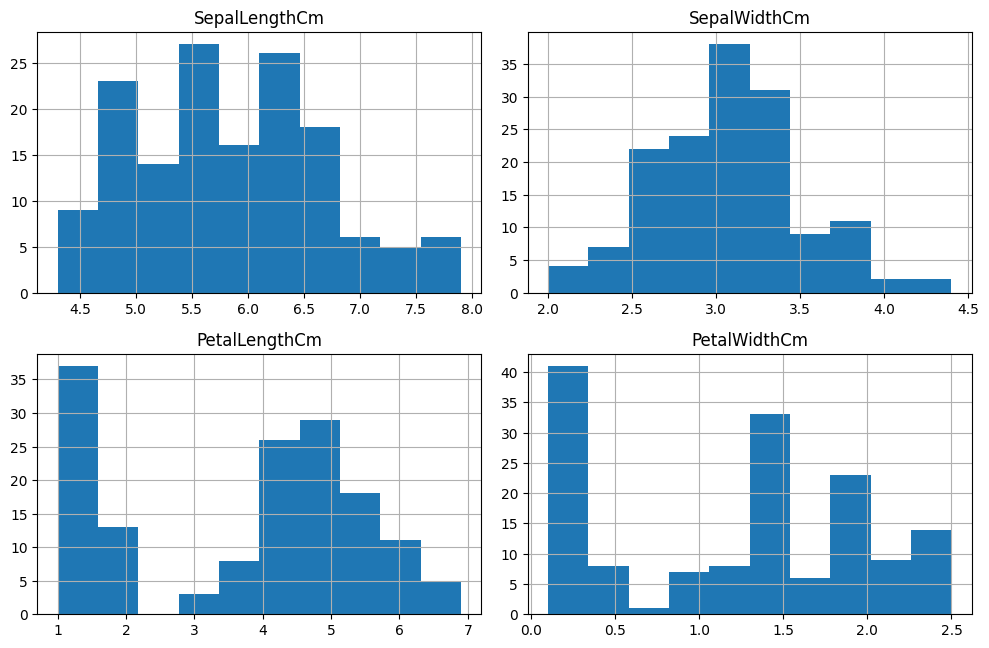

In [25]:
df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].hist(layout=(5,2),figsize=(10,16))
plt.tight_layout()
plt.show()

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

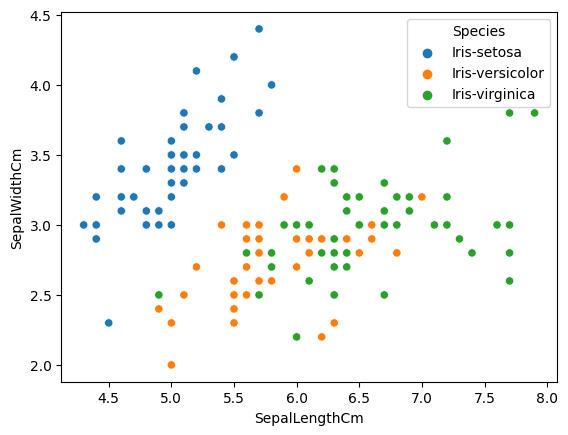

In [26]:
sns.scatterplot(x=df["SepalLengthCm"],y=df["SepalWidthCm"],hue=df["Species"])

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

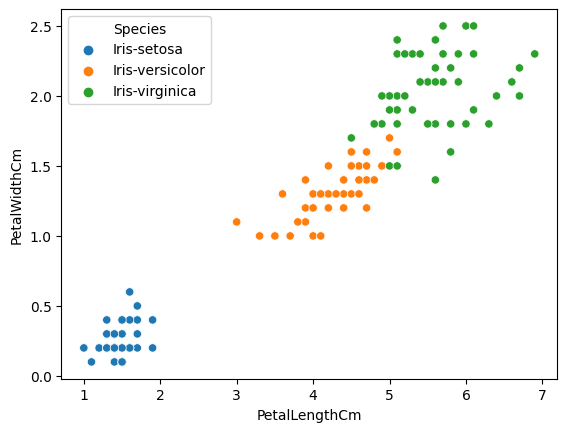

In [27]:
sns.scatterplot(x=df["PetalLengthCm"],y=df["PetalWidthCm"],hue=df["Species"])

In [28]:
df.corr()

ValueError: could not convert string to float: 'Iris-setosa'

In [29]:
cor=df.corr()

ValueError: could not convert string to float: 'Iris-setosa'

In [ ]:
sns.heatmap(cor,annot=True)

In [ ]:
lb=LabelEncoder()
df["Species"]=lb.fit_transform(df["Species"])

In [ ]:
x=df.drop("Species",axis=1)
y=df["Species"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [ ]:
Model1=LogisticRegression()
Model1.fit(x_train,y_train)

In [ ]:
pred1=Model1.predict(x_test)
acc_lr=round(accuracy_score(y_test,pred1),3)
print("Accuracy",(acc_lr))

In [ ]:
Model2=KNeighborsClassifier()
Model2.fit(x_train,y_train)

In [ ]:
pred2=Model2.predict(x_test)
acc_knn=round(accuracy_score(y_test,pred2),3)
print("Accuracy",(acc_knn))

In [ ]:
Model3=DecisionTreeClassifier(max_depth=3,random_state=10)
Model3.fit(x_train,y_train)

In [ ]:
Model3.classes_

In [ ]:
plot_tree(Model3,class_names=df.columns,rounded=True,filled=True,max_depth=3)

In [ ]:
pred3=Model3.predict(x_test)
acc_DT=round(accuracy_score(y_test,pred3),3)
print("Accuracy",(acc_DT))

In [ ]:
Model4=SVC(kernel="linear",random_state=16)
Model4.fit(x_train,y_train)

In [ ]:
pred4=Model4.predict(x_test)
acc_svm=round(accuracy_score(y_test,pred4),3)
print("Accuracy",(acc_svm))

In [ ]:
results=pd.DataFrame({"MODEL":["LogisticRegressionCV","KNN","DecisionTree","SVM"],
                     "ACCURACY":[acc_lr,acc_knn,acc_DT,acc_svm]})

In [ ]:
results

In [ ]:
results.plot(kind="barh",x="MODEL",y="ACCURACY",color=["red","blue","yellow","orange"],xlabel="Accuracy",legend=False)